In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(v):
    x,y=v
    return (x - 3)**2 + (y + 1)**2

In [24]:
#Quartic banana z= (x**2 -1)**2 + y**2
def f(v):
    x, y = v
    return (x**2 - 1)**2 + y**2 


In [21]:
#z=log(1+x**2+y**2)
def f(v):
    x, y = v
    return np.log(1 + x**2 + y**2)

In [9]:
def f(v):
    x, y = v
    return np.exp(x) + np.exp(y) + x**2 + y**2

In [52]:
#creating a noisy function
K = 10
alpha = 0
np.random.seed(27)
phi = 1 * np.pi * np.random.rand(K, K)  # fixed phases

# Function f(v) = sin(x) + y^2 + noise
#changed to f(v) = x^2 + y^2 + noise
def f(v):
    x, y = v
    #f_val= np.sin(x) + y**2
    f_val = x**2 + y**2
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            f_val += 0.05*(amp * np.cos(k1 * x + k2 * y + phi[k1, k2]))
    return f_val


In [ ]:
# SPSA hyperparameters
a = 0.5
c = 0.1
A = 10
alpha = 0.602
gamma = 0.101
f_history = []

# Initial point
theta = np.array([10.0, -10.0])
iterations = 100
np.random.seed(42)  

for k in range(iterations):
    ak = a / (A + k + 1)**alpha
    ck = c / (k + 1)**gamma
    
    #perturbation vector Δ_k from Bernouli(±1)
    delta = np.random.choice([-1, 1], size=2)
    
    theta_plus = theta + ck * delta
    theta_minus = theta - ck * delta
    y_plus = f(theta_plus)
    y_minus = f(theta_minus)
    
    g_hat = (y_plus - y_minus) / (2 * ck) * (1.0/delta) 
    
    theta = theta - ak * g_hat
    f_val = f(theta)
    f_history.append(f_val)
    print(f"--- Iteration {k+1} ---")
    print(f"a_k = {ak:.4f}, c_k = {ck:.4f}")
    print(f"Δ_k = {delta}")
    print(f"f(θ + c_k * Δ) = {y_plus:.4f}, f(θ - c_k * Δ) = {y_minus:.4f}")
    print(f"Gradient estimate: {g_hat}")
    print(f"Updated θ: {theta}\n")
    
print(f"Function value at last iteration: {f(theta)}\n")
print(f"Final θ: {theta}\n")
print(f"Number of iterations: {len(f_history)}\n")

--- Iteration 1 ---
a_k = 0.1180, c_k = 0.1000
Δ_k = [-1  1]
f(θ + c_k * Δ) = 196.0481, f(θ - c_k * Δ) = 204.0213
Gradient estimate: [ 39.86614258 -39.86614258]
Updated θ: [ 5.29395773 -5.29395773]

--- Iteration 2 ---
a_k = 0.1120, c_k = 0.0932
Δ_k = [-1 -1]
f(θ + c_k * Δ) = 55.8916, f(θ - c_k * Δ) = 55.9727
Gradient estimate: [0.43502456 0.43502456]
Updated θ: [ 5.24522546 -5.34269   ]

--- Iteration 3 ---
a_k = 0.1068, c_k = 0.0895
Δ_k = [-1  1]
f(θ + c_k * Δ) = 53.9963, f(θ - c_k * Δ) = 57.8103
Gradient estimate: [ 21.3079977 -21.3079977]
Updated θ: [ 2.97055364 -3.06801818]

--- Iteration 4 ---
a_k = 0.1021, c_k = 0.0869
Δ_k = [-1 -1]
f(θ + c_k * Δ) = 18.2367, f(θ - c_k * Δ) = 18.2272
Gradient estimate: [-0.05470226 -0.05470226]
Updated θ: [ 2.97613842 -3.0624334 ]

--- Iteration 5 ---
a_k = 0.0979, c_k = 0.0850
Δ_k = [-1  1]
f(θ + c_k * Δ) = 17.1968, f(θ - c_k * Δ) = 19.2773
Gradient estimate: [ 12.23876288 -12.23876288]
Updated θ: [ 1.77746579 -1.86376078]

--- Iteration 6 ---
a

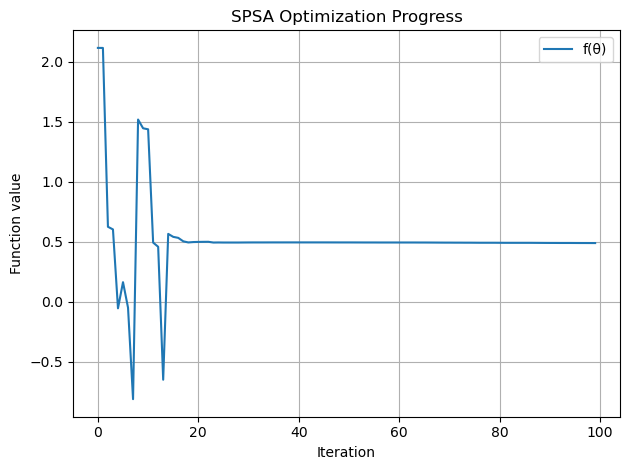

In [45]:
plt.plot(f_history, label='f(θ)')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('SPSA Optimization Progress')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()